# <h1 style="color:red; font-family: Arial;"> Movie Data Analysis </h1>

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
plt.rcParams['figure.figsize'] = (12,8)
import warnings
warnings.filterwarnings('ignore')

# 2 - Data collection

In [2]:
df1 = pd.read_csv("./imdb_10000_movies.csv")
df2 = pd.read_csv("./imdb_10000_movies1.csv")

In [3]:
df = pd.concat([df1,df2])
df.head()

,Name of movie,YEAR,RATES,METASCORE,gross_collection,Votes,Watch Time,Genre,Certificate,Description,Director,Stars
0,The Shawshank Redemption,1994,9.3,82,"28,341,469",2806836,142,Drama,A,"Over the course of several years, two convicts...",\nFrank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi..."
1,The Godfather,1972,9.2,100,"134,966,411",1955954,175,"Crime, Drama",A,"Don Vito Corleone, head of a mafia family, dec...",\nFrancis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Diane Ke..."
2,Ramayana: The Legend of Prince Rama,1993,9.2,NAN,13031,13031,135,"Animation, Action, Adventure",U,An anime adaptation of the Hindu epic the Rama...,"Directors:\nRam Mohan, \nYûgô Sakô, \nKoichi S...","Arun Govil, Nikhil Kapoor, Edie Mirman, Rael P..."
3,Hababam Sinifi,1975,9.2,NAN,42248,42248,87,"Comedy, Drama",NaN,"Lazy, uneducated students share a very close b...",\nErtem Egilmez,"Kemal Sunal, Münir Özkul, Halit Akçatepe, Tari..."
4,The Dark Knight,2008,9.0,84,"534,858,444",2788568,152,"Action, Crime, Drama",UA,When the menace known as the Joker wreaks havo...,\nChristopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M..."


In [4]:
df.describe()

,RATES,Votes,Watch Time
count,20000.000000,2.000000e+04,20000.000000
mean,6.625255,7.339473e+04,117.734700
std,0.893596,1.369026e+05,24.825343
min,1.200000,1.000000e+04,45.000000
25%,6.000000,1.762225e+04,100.000000
50%,6.700000,3.022100e+04,112.000000
75%,7.200000,6.203100e+04,132.000000
max,9.300000,2.806836e+06,439.000000


In [5]:
df.describe(include='object').T

,count,unique,top,freq
Name of movie,20000,9803,Fukrey 3,175
YEAR,20000,196,2023,8785
METASCORE,20000,94,NAN,5489
gross_collection,20000,10720,15942,176
Genre,20000,427,"Action, Adventure, Drama",868
Certificate,16826,30,R,4256
Description,20000,10103,Hadley and Oliver begin to fall for each other...,175
Director,20000,4212,\nScott Waugh,350
Stars,19995,10055,"Anna Castillo, Tamar Novas, Tony Corvillo, Mar...",175


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name of movie     20000 non-null  object 
 1   YEAR              20000 non-null  object 
 2   RATES             20000 non-null  float64
 3   METASCORE         20000 non-null  object 
 4   gross_collection  20000 non-null  object 
 5   Votes             20000 non-null  int64  
 6   Watch Time        20000 non-null  int64  
 7   Genre             20000 non-null  object 
 8   Certificate       16826 non-null  object 
 9   Description       20000 non-null  object 
 10  Director          20000 non-null  object 
 11  Stars             19995 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.0+ MB


_<span style="color:blue; font-family: Arial;">There are features that are numeric but representig data type as object</span>_


<Axes: >

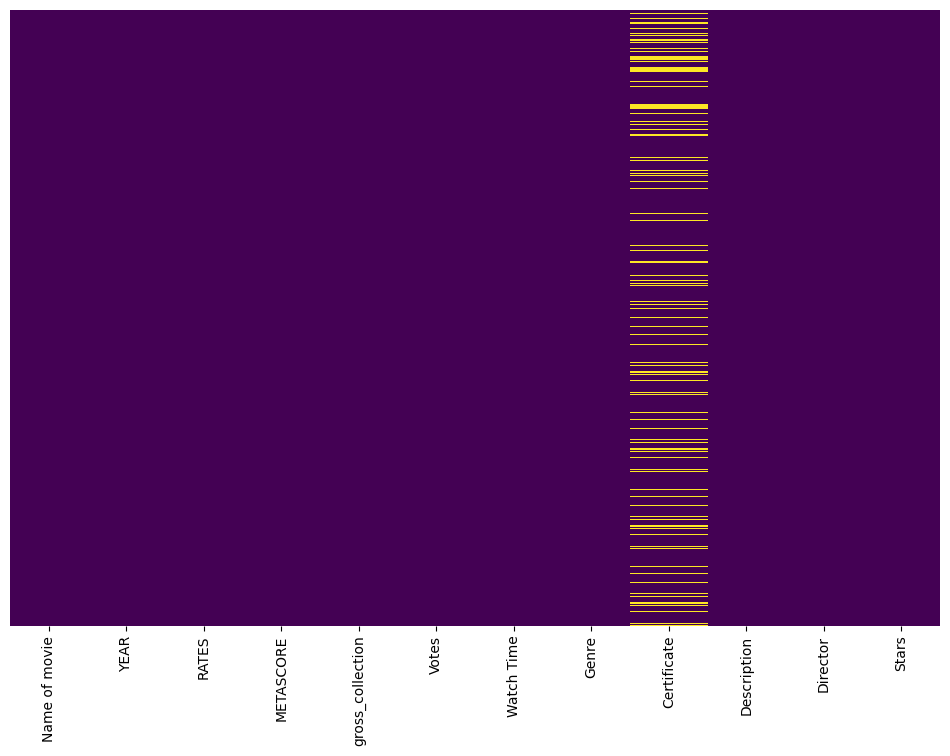

In [7]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [8]:
#calculating percentage of missing values for each columns
for i,j in zip(df.isna().sum().index,df.isna().sum()):
    print(f'Missing values in {i}:{(j/len(df))*100}%')

Missing values in Name of movie:0.0%
Missing values in YEAR:0.0%
Missing values in RATES:0.0%
Missing values in METASCORE:0.0%
Missing values in gross_collection:0.0%
Missing values in Votes:0.0%
Missing values in Watch Time:0.0%
Missing values in Genre:0.0%
Missing values in Certificate:15.870000000000001%
Missing values in Description:0.0%
Missing values in Director:0.0%
Missing values in Stars:0.025%


In [9]:
df.dropna(subset=['Stars'],inplace=True)

In [10]:
df.shape

(19995, 12)

In [11]:
df.isnull().sum()

Name of movie          0
YEAR                   0
RATES                  0
METASCORE              0
gross_collection       0
Votes                  0
Watch Time             0
Genre                  0
Certificate         3169
Description            0
Director               0
Stars                  0
dtype: int64

# 2 - Data Cleaning

In [12]:
def clean_year(txt):
    if isinstance(txt,int):
        txt = str(txt)
    txt = re.sub(r'[^\d+]','',txt)
    return int(txt)

In [13]:
df['YEAR'] = df['YEAR'].apply(clean_year)

In [14]:
def convert_int(input):
    try:
        input = input.replace(',','')
        input = int(input)
        return input
    except Exception as e:
        return False

In [15]:
df['gross_collection'] = df['gross_collection'].apply(convert_int)

In [16]:
df['METASCORE'] = pd.to_numeric(df['METASCORE'], errors='coerce')

In [17]:
mean_meta = df['METASCORE'].mean()
df['METASCORE'].fillna(mean_meta, inplace=True)

# 4 - check for outliers

In [18]:
def detect_outliers_RATES(df):
    outliers = df[(df['RATES'] < 0) | (df['RATES'] > 10)]['RATES']
    if not outliers.empty:
        print("Outliers in RATES column:")
        print(outliers)
    else:
        print("No outliers found in RATES column.")

detect_outliers_RATES(df)

No outliers found in RATES column.


In [19]:
def detect_outliers_metascore(df):
    outliers = df[(df['METASCORE'] < 0) | (df['METASCORE'] > 100)]['METASCORE']
    if not outliers.empty:
        print("Outliers in METASCORE column:")
        print(outliers)
    else:
        print("No outliers found in METASCORE column.")

detect_outliers_metascore(df)

No outliers found in METASCORE column.


In [20]:
def detect_outliers_gross_collection(df):
    outliers = df[df['gross_collection'] < 0]['gross_collection']
    if not outliers.empty:
        print("Outliers in gross_collection column:")
        print(outliers)
    else:
        print("No outliers found in gross_collection column.")

detect_outliers_gross_collection(df)

No outliers found in gross_collection column.


In [21]:
def detect_outliers_votes(df):
    outliers = df[df['Votes'] < 0]['Votes']
    if not outliers.empty:
        print("Outliers in Votes column:")
        print(outliers)
    else:
        print("No outliers found in Votes column.")

detect_outliers_votes(df)

No outliers found in Votes column.


In [22]:
#renaming column name
df.rename(columns={'Watch Time':'Screening'},inplace=True)

In [23]:
def detect_outliers_Screening(df):
    outliers = df[df['Screening'] < 0]['Screening']
    if not outliers.empty:
        print("Outliers in Screening column:")
        print(outliers)
    else:
        print("No outliers found in Screening column.")

detect_outliers_Screening(df)

No outliers found in Screening column.


# 5 - check for correlation

In [24]:
 df.corr( numeric_only= True)

,YEAR,RATES,METASCORE,gross_collection,Votes,Screening
YEAR,1.000000,-0.226229,-0.173743,-0.133562,-0.049377,0.204134
RATES,-0.226229,1.000000,0.533511,0.078947,0.283783,0.263880
METASCORE,-0.173743,0.533511,1.000000,0.050589,0.280637,0.179768
gross_collection,-0.133562,0.078947,0.050589,1.000000,0.587172,-0.007895
Votes,-0.049377,0.283783,0.280637,0.587172,1.000000,0.163929
Screening,0.204134,0.263880,0.179768,-0.007895,0.163929,1.000000


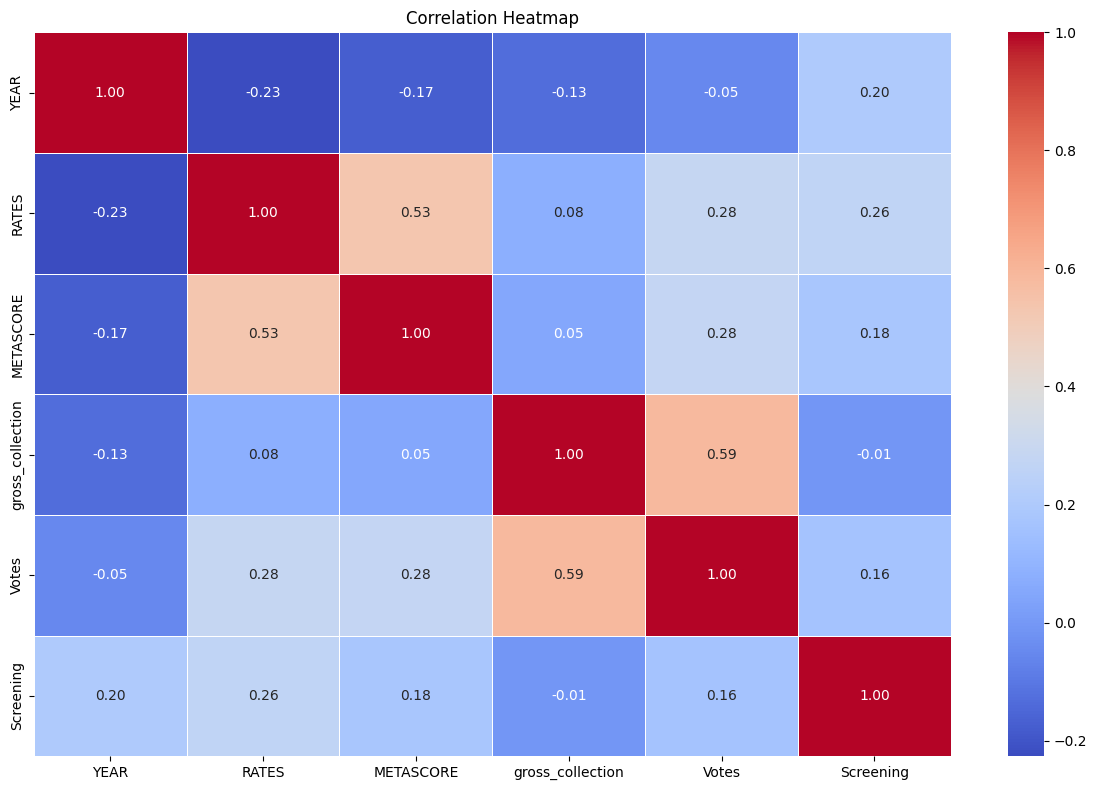

In [25]:
sns.heatmap(df.corr( numeric_only= True), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)


plt.title('Correlation Heatmap')
plt.tight_layout()


plt.show()

<h2 style="color:blue; font-family: Arial;">Observation:</h2>

<h3 style="color:orange; font-family: Arial;">1) "RATES" and "METASCORE" variables have a moderate positive correlation, suggests that movies with higher ratings tend to have higher Metascores</h3>

<h3 style="color:orange; font-family: Arial;">2) "Votes" shows a relatively strong positive correlation with both "RATES" and "METASCORE". This implies that popular movies with higher viewer engagement tend to have higher ratings as well.</h3>

<h3 style="color:orange; font-family: Arial;">3) "watch time" have a moderate positive correlation with "RATES" and "Votes". This might suggest that movies with more screenings tend to have higher ratings and more significant viewer engagement.</h3>

# 6 - Visualization

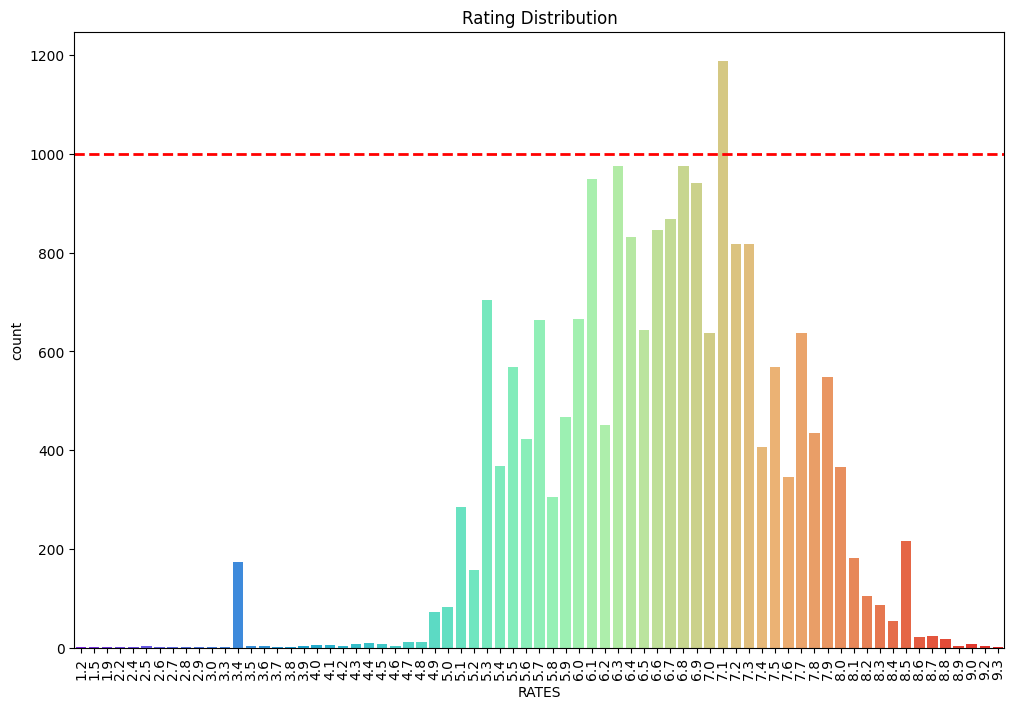

In [26]:
sns.countplot(df,x='RATES',palette='rainbow')
plt.xticks(rotation=90)
plt.title('Rating Distribution')
plt.axhline(y=1000, color='r', linestyle='--', linewidth=2)
plt.show()

<h2 style="color:blue; font-family: Arial;">Observation:</h2>

<h3 style="color:blue; font-family: Arial;">Most of the people prefer to rate 7.1</h3>
<h3 style="color:blue; font-family: Arial;">Mostly the ratings are between 6 to 7</h3>


In [27]:
bin_size = 3
bin_edges = list(range(min(df['YEAR']), 2024, bin_size))

# Bin the years and calculate the average rating for each bin
df['year_bin'] = pd.cut(df['YEAR'], bins=bin_edges)


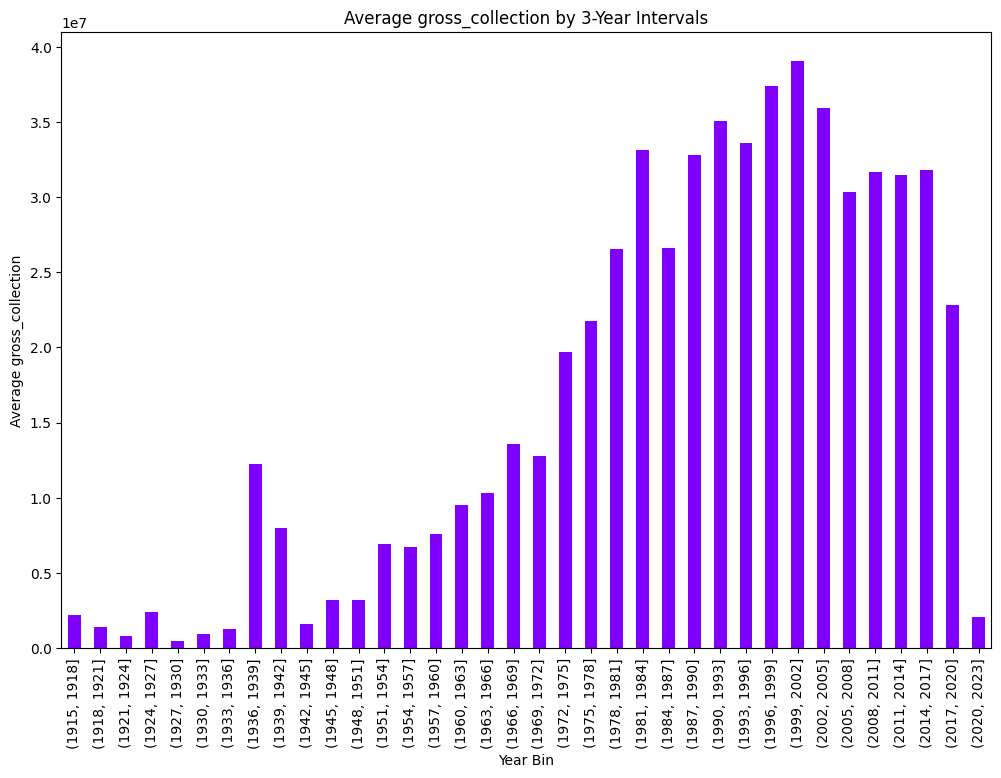

In [28]:
gross_collection = df.groupby('year_bin')['gross_collection'].mean()
gross_collection.plot(kind='bar', colormap='rainbow')
plt.title('Average gross_collection by 3-Year Intervals')
plt.xlabel('Year Bin')
plt.ylabel('Average gross_collection')
plt.show()

<h2 style="color:blue; font-family: Arial;">Observation:</h2>

<h3 style="color:blue; font-family: Arial;">Higher gross collection has been seen between 1999 to 2002</h3>

<h3 style="color:blue; font-family: Arial;">Due to the impact of the COVID-19 pandemic, there has been a significant decline in gross collections over the past three years.</h3>

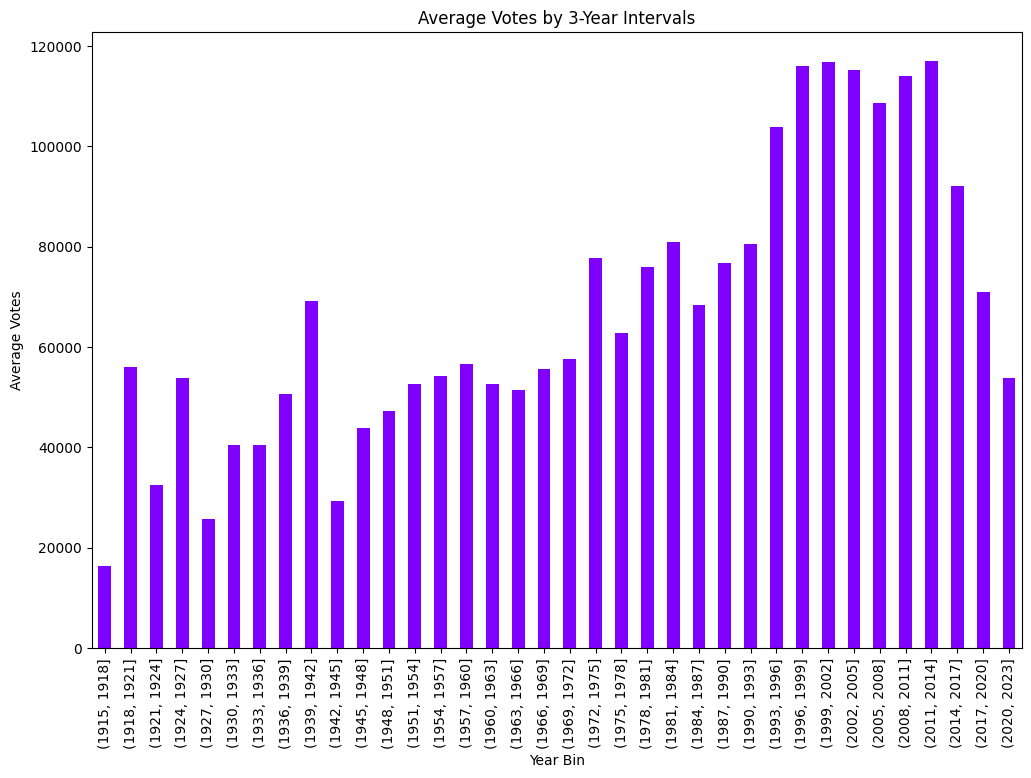

In [29]:
avg_Votes = df.groupby('year_bin')['Votes'].mean()
avg_Votes.plot(kind='bar',colormap='rainbow')
plt.title('Average Votes by 3-Year Intervals')
plt.xlabel('Year Bin')
plt.ylabel('Average Votes')
plt.show()

<h2 style="color:blue; font-family: Arial;">Observation:</h2>

<h3 style="color:blue; font-family: Arial;">The period from 1996 to 2002 saw a significant surge in the number of votes cast.</h3>

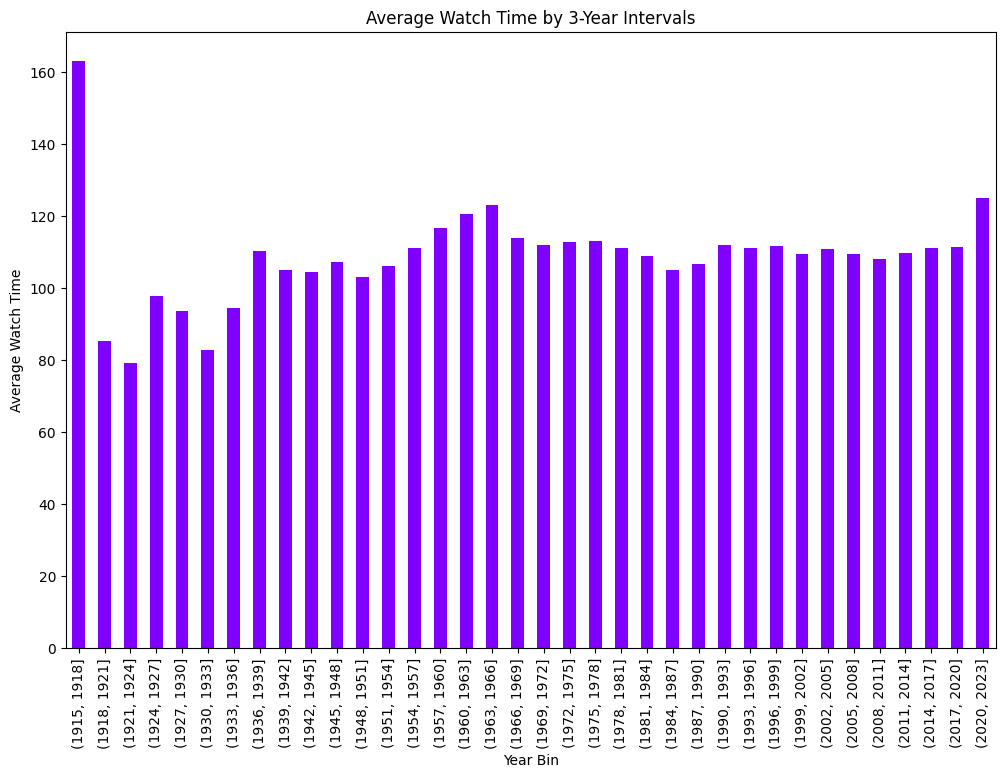

In [30]:
avg_Watch = df.groupby('year_bin')['Screening'].mean()
avg_Watch.plot(kind='bar',colormap='rainbow')
plt.title('Average Watch Time by 3-Year Intervals')
plt.xlabel('Year Bin')
plt.ylabel('Average Watch Time')
plt.show()

<h2 style="color:blue; font-family: Arial;">Observation:</h2>

<h3 style="color:blue; font-family: Arial;">Movies between 1915 to 1918 contains higher watch time</h3>

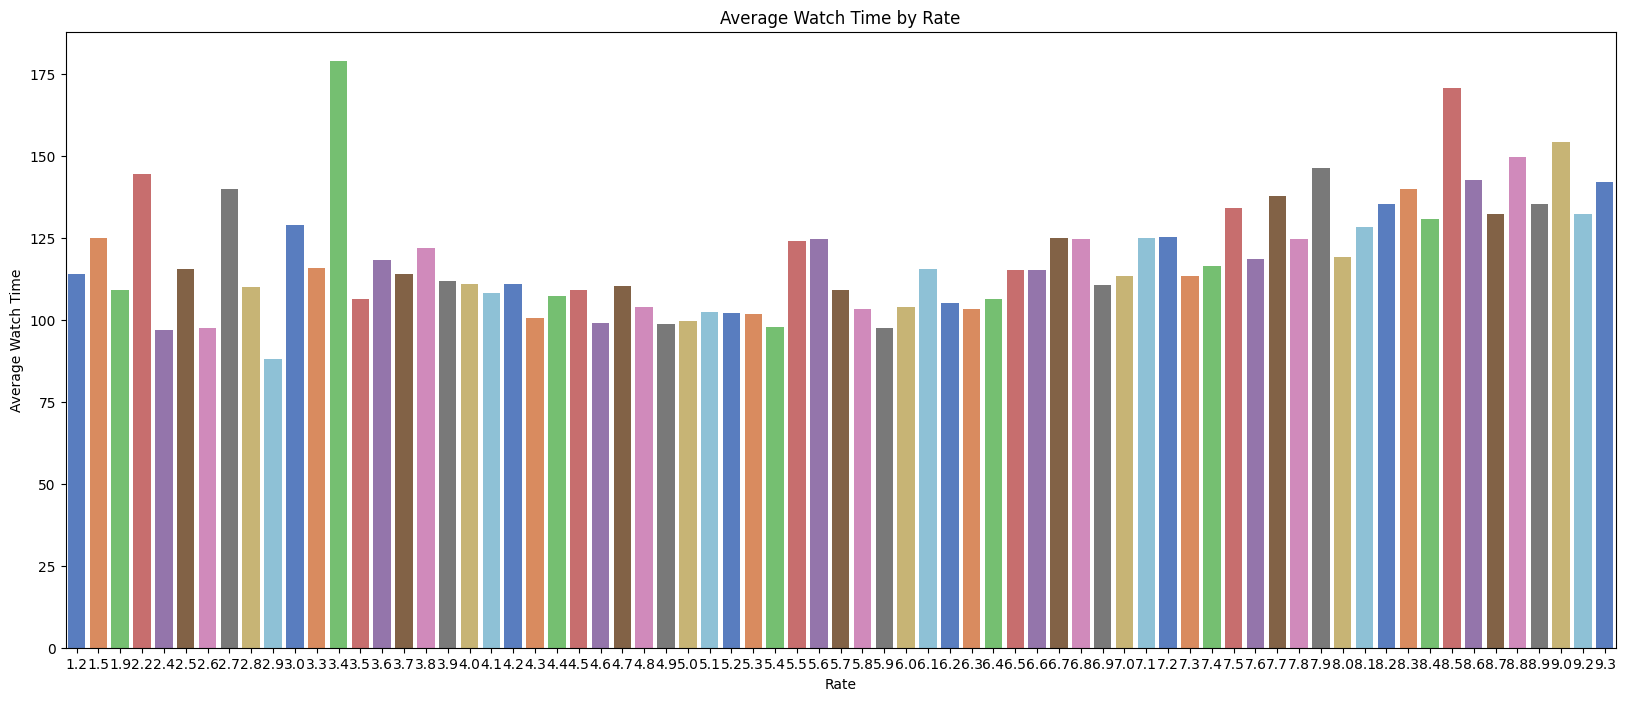

In [31]:
average_watch_time = df.groupby('RATES')['Screening'].mean().sort_values(ascending=False)

plt.figure(figsize=(20, 8))
sns.barplot(x=average_watch_time.index, y=average_watch_time.values, palette='muted')
plt.title('Average Watch Time by Rate')
plt.xlabel('Rate')
plt.ylabel('Average Watch Time')
plt.show()

<h2 style="color:blue; font-family: Arial;">Observation:</h2>

<h3 style="color:blue; font-family: Arial;">Movies which has watch time 2hrs or above are likely to have good ratings</h3>

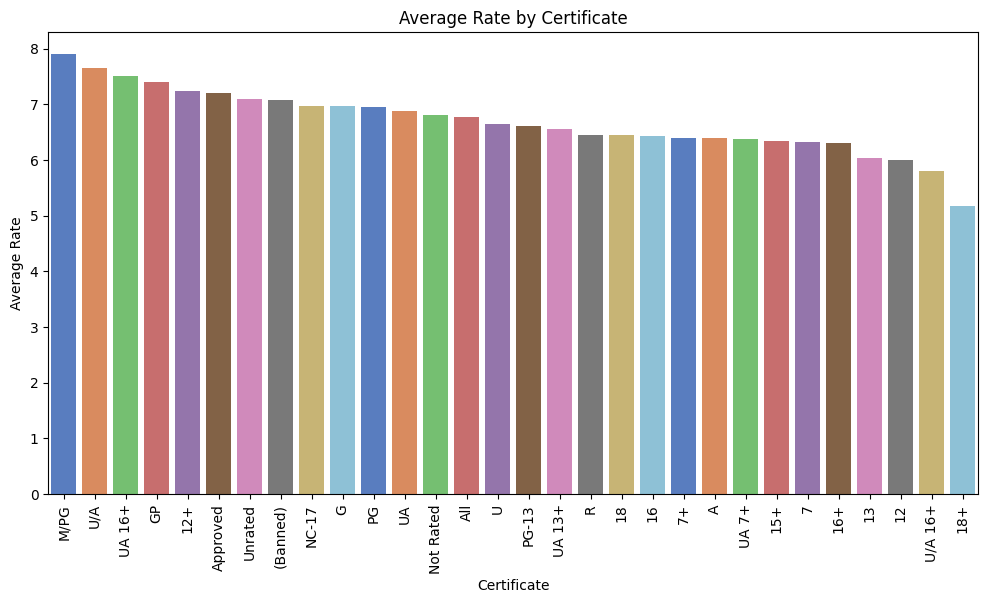

In [32]:
average_rate_by_certificate = df.groupby('Certificate')['RATES'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=average_rate_by_certificate.index, y=average_rate_by_certificate.values, palette='muted')
plt.title('Average Rate by Certificate')
plt.xlabel('Certificate')
plt.ylabel('Average Rate')
plt.xticks(rotation=90)
plt.show()

<h2 style="color:blue; font-family: Arial;">Observation:</h2>

<h3 style="color:blue; font-family: Arial;">
Movies with a "mature audiences" or "parental guidance suggested" (M/PG) rating tend to have higher viewer approval</h3>

In [116]:
sub.to_csv("sub.csv", index=False)